## Modelos de Regresión Lineal
# Datos simulados

y = a + b * x

x : 100 valores distribuidos según una N(1.5, 2.5)

ye = 2 + 1.8*x + e

e está distribuida según N(0, 0.8)

In [6]:
import pandas as pd
import numpy as np

In [7]:
x  = 1.5 + 2.5*np.random.randn(100)

In [8]:
res = 0.8*np.random.randn(100)

In [9]:
y_pred = 2 + 1.8*x

In [10]:
y_act = 2 + 1.8*x + res

In [46]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()
y_mean_list = [np.mean(y_act) for i in range(len(x_list))]

In [47]:
y_mean_list

[4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,
 4.490662464753686,


In [48]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list,
        "y_mean": y_mean_list
    }
)

In [49]:
data

,x,y_actual,y_prediccion,y_mean
0,-1.833486,-1.253940,-1.300275,4.490662
1,7.141213,15.467059,14.854184,4.490662
2,4.775180,9.429282,10.595323,4.490662
3,1.631333,5.569050,4.936400,4.490662
4,2.306564,6.037436,6.151816,4.490662
...,...,...,...,...
95,3.683346,8.135922,8.630023,4.490662
96,3.388619,8.382514,8.099515,4.490662
97,-2.863823,-2.708205,-3.154881,4.490662
98,-3.124055,-4.697372,-3.623299,4.490662


Text(0.5, 1.0, 'Valor Actual vs Predicción')

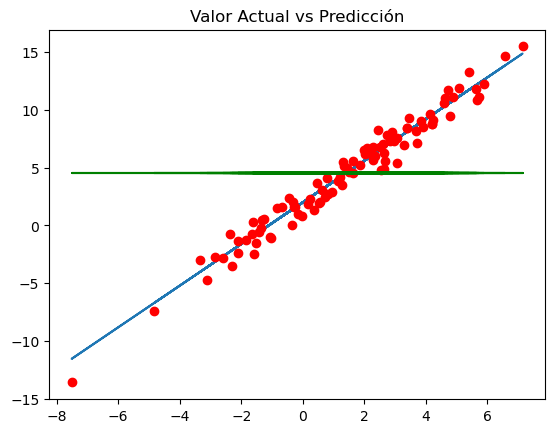

In [50]:
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean_list, "g")
plt.title ("Valor Actual vs Predicción")

In [51]:
data ["SSR"] = (data["y_prediccion"]-data["y_mean"])**2
data ["SST"] = (data["y_actual"]-data["y_mean"])**2
data ["SSERROR"] = (data["y_actual"]-data["y_prediccion"])**2

In [52]:
SSR = np.sum(data["SSR"])
SST = np.sum(data["SST"])
SSERROR = np.sum(data["SSERROR"])


In [53]:
SSR

2244.264926020914

In [54]:
SSERROR

78.16264565876236

In [55]:
SST

2397.2278906206593

In [56]:
data.head()

,x,y_actual,y_prediccion,y_mean,SSR,SST,SSERROR
0,-1.833486,-1.253940,-1.300275,4.490662,33.534953,33.000458,0.002147
1,7.141213,15.467059,14.854184,4.490662,107.402583,120.481286,0.375616
2,4.775180,9.429282,10.595323,4.490662,37.266883,24.389961,1.359653
3,1.631333,5.569050,4.936400,4.490662,0.198682,1.162920,0.400246
4,2.306564,6.037436,6.151816,4.490662,2.759430,2.392507,0.013083


In [57]:
R2= SSR/SST
R2

0.9361917299568286

(array([ 3.,  5., 16., 14., 19., 12., 11., 11.,  5.,  4.]),
 array([-1.85002371, -1.45123558, -1.05244745, -0.65365933, -0.2548712 ,
         0.14391693,  0.54270505,  0.94149318,  1.3402813 ,  1.73906943,
         2.13785756]),
 <BarContainer object of 10 artists>)

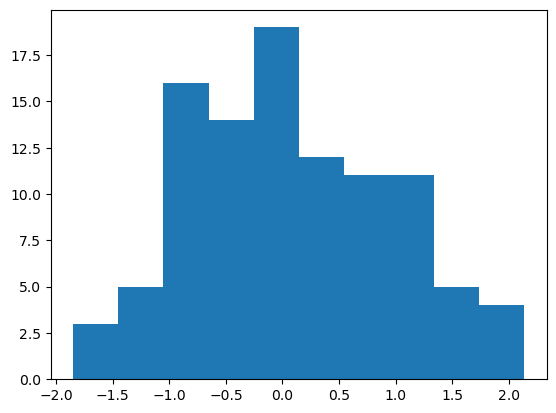

In [58]:
plt.hist(data["y_prediccion"]-data["y_actual"])